In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('data_cleaned.csv')
# Membaca file CSV menggunakan pandas

In [66]:
df = pd.get_dummies(df, columns=['category', 'time'], drop_first=True)
# Mengaplikasikan one-hot encoding pada kolom 'category' dan 'time' dalam DataFrame 'df'. 
# 'drop_first=True' digunakan untuk menghindari jebakan variabel dummy (dummy variable trap).

In [67]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,attended,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,time_PM
0,1,17,79.56,8,3,0,0,0,1,0,0,1
1,2,10,79.01,2,1,0,0,1,0,0,0,0
2,3,16,74.53,14,7,0,0,0,1,0,0,0
3,4,5,86.12,10,5,0,1,0,0,0,0,0
4,5,15,69.29,8,4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,0,0,1,0,0,0,0
1496,1497,29,89.55,2,1,0,0,0,1,0,0,0
1497,1498,9,87.38,4,2,0,0,1,0,0,0,0
1498,1499,34,68.64,14,7,0,0,0,0,0,0,0


In [68]:
X = df.drop('attended', axis=1)  
# Memisahkan kolom target 'attended' dan menyimpan fitur-fitur lainnya dalam variabel 'X'

y = df[['attended']]
# Memisahkan kolom target 'attended' dan menyimpannya dalam variabel 'y'

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Mengimpor modul-modul yang dibutuhkan dari library scikit-learn, matplotlib, dan seaborn

In [70]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [71]:
# Membuat objek RandomForestClassifier dengan 50 pohon keputusan dan seed (random state) 1
rfcl = RandomForestClassifier(n_estimators=50, random_state=1)

# Melatih model RandomForestClassifier menggunakan data latih
rfcl = rfcl.fit(X_train, y_train)

0.7466666666666667


<AxesSubplot:>

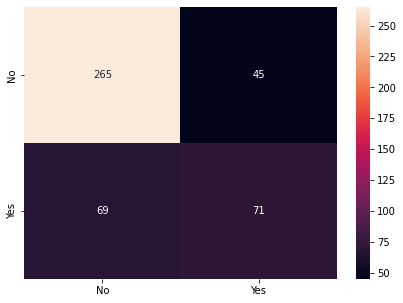

In [72]:
#For Random Forrest Classifier
y_predict = rfcl.predict(X_test)
# Menghitung akurasi model terhadap data uji dan mencetaknya
print(rfcl.score(X_test, y_test))

# Menghitung matriks kebingungan (confusion matrix) dan mencetaknya
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

# Membuat dataframe dari matriks kebingungan dan menampilkannya dalam bentuk heatmap
df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                  columns=[i for i in ["No", "Yes"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [73]:
# Menghitung nilai precision, recall, dan F1-score dari model dan mencetaknya
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6120689655172413
Recall: 0.5071428571428571
F1-Score: 0.5546874999999999


In [79]:
df1 = df
# Menyalin DataFrame 'df' ke dalam 'df1'. Perubahan pada 'df1' akan mempengaruhi 'df'.

In [120]:

X = df1.copy()
# Menyalin 'df1' ke dalam 'X' untuk menghindari perubahan pada 'df1' saat manipulasi dilakukan pada 'X'.
y = X.pop('attended')
# Memisahkan kolom 'attended' dari 'X' dan menyimpannya dalam variabel 'y'.

In [92]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [87]:
# Memisahkan data menjadi 70% set data latih dan 30% set data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [88]:
regression_model = LogisticRegression()
# Membuat objek model regresi logistik

regression_model.fit(X_train, y_train)
# Melatih model regresi logistik menggunakan data latih

LogisticRegression()

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
y_true = y_test
y_pred = regression_model.predict(X_test) 

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Mencetak hasil evaluasi model, termasuk MAE, MSE, RMSE, R-squared, dan akurasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy Score: {accuracy:.3f}")

Mean Absolute Error (MAE): 0.2222222222222222
Mean Squared Error (MSE): 0.2222222222222222
Root Mean Squared Error (RMSE): 0.4714045207910317
R-squared (R²): -0.03686635944700467
Accuracy Score: 0.778


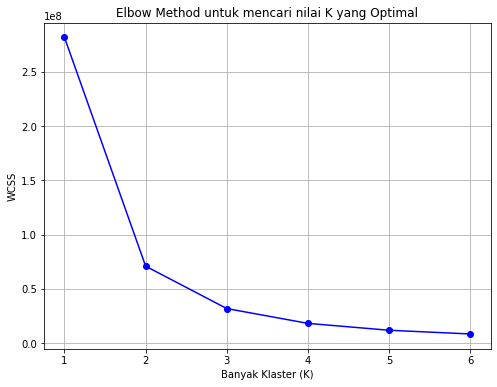

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

X = df1.iloc[:, :-1].values # Ambil data-data fiturnya untuk variabel X
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)

Silhouette Score: 0.42546842065812157
Calinski-Harabasz Score: 2014.0789441501202
Davies-Bouldin Score: 0.7833458389626972


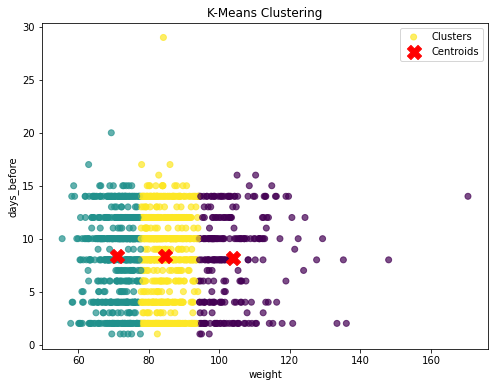

In [118]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Pilih kolom numerik sebagai fitur
X = df1[['weight', 'days_before']]  


k = 3

# B1. Implementasikan metode K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Prediksi klaster untuk setiap sampel dalam data
predicted_clusters = kmeans.labels_

# B2. Evaluasi klasterisasi (tanpa label asli dataset)
silhouette_avg = silhouette_score(X, predicted_clusters)
calinski_harabasz_score_val = calinski_harabasz_score(X, predicted_clusters)
davies_bouldin_score_val = davies_bouldin_score(X, predicted_clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz_score_val)
print("Davies-Bouldin Score:", davies_bouldin_score_val)

# B3. Buat plot hasil klasterisasi
plt.figure(figsize=(8, 6))
plt.scatter(X['weight'], X['days_before'], c=predicted_clusters, cmap='viridis', label='Clusters', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.xlabel('weight')
plt.ylabel('days_before')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [119]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Menggunakan label asli dataset 
y_true = df1['attended']

# Evaluasi dengan label asli dataset
ari = adjusted_rand_score(y_true, predicted_clusters)
nmi = normalized_mutual_info_score(y_true, predicted_clusters)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


Adjusted Rand Index (ARI): 0.019957443139464834
Normalized Mutual Information (NMI): 0.04229097218708139
